## Estadística  Ejercicios

In [45]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

import random
import pickle as pkl

In [ ]:
# Versiones

print(f"numpy=={np.__version__}")
print(f"matplotlib=={matplotlib.__version__}")
print(f"scipy=={scipy.__version__}")

In [61]:
with open("FUELCONSUMPTION_CITY.pkl", "br") as f:
    fuel_city = pkl.load(f)
    
with open("FUELCONSUMPTION_HWY.pkl", "br") as f:
    fuel_hwy = pkl.load(f)

In [48]:
fuel_city=fuel_city.sort() # Gasto de combustible en la ciudad

In [ ]:
fuel_hwy # Gasto de combustible en la autovía

### Ejercicio 01:
- Define una función que tome como entrada un array y retorne la varianza. Apóyate en la siguiente fórmula:
$$ \mathbf{S^2} = \frac{1}{n} \sum_{i=1}^{n} (x_{i}^{2}- \overline{x}^2)$$

- Comprueba que funciona correctamente comparándola con _**np.var()**_.

### Ejercicio 02:
- Define una función que tome como entrada un array y retorne la desviación estándar. Apóyate en la siguiente fórmula:

$$ \mathbf{S} = \sigma = \sqrt{\frac{1}{n} \sum_{i=1}^{n} x_{i}^{2}- \overline{x}^2}$$

- Comprueba que funciona correctamente comprobándola con _**np.std()**_.

### Ejercicio 03:
- Define una función que tome como parámetro un array y retorne los siguientes estadísticos en forma de diccionario:
    - Mínimo
    - Máximo
    - Media
    - Cuartiles Q1, Q2 (mediana) y Q3
    - Rango intercuartil
    - Desviación estándar
- Prueba la función con los arrays **fuel_city** y **fuel_hwy**.

In [62]:
def calcular_estadisticas(vector):
    # crear diccionario
    diccionario = dict()
    
    # calcular estadisticas
    min = np.min(vector)
    max = np.max(vector)
    media = np.mean(vector)
    Q1 = np.quantile(vector, 0.25)
    Q2 = np.median(vector)
    Q3 = np.quantile(vector, 0.75)
    iqr = Q3 - Q1
    desv = np.std(vector)
     
    # agregar estadísticas al diccionario
    diccionario['min'] = min
    diccionario['max'] = max
    diccionario['mean'] = media
    diccionario['Q1'] = Q1
    diccionario['Q3'] = Q3
    diccionario['median'] = Q2
    diccionario['IQR'] = iqr
    diccionario['Std'] = desv
    # retornar el diccionario creado
    return diccionario



    

In [96]:
def imprime_grafico(vector, array_sin_outliners):
    # calcular estadisticas
    min = np.min(vector)
    max = np.max(vector)
    media = np.mean(vector)
    Q1 = np.quantile(vector, 0.25)
    Q2 = np.median(vector)
    Q3 = np.quantile(vector, 0.75)
    iqr = Q3 - Q1
    print(f"iqr: {iqr}")
    desv = np.std(vector)
    minim = Q1 - (1.0 * iqr)
    maxim = Q3 + (1.5 * iqr)
    plt.figure(figsize=(10, 6))
    plt.hist(vector, bins=30, color='skyblue', alpha=0.5)
    plt.hist(array_sin_outliners, bins=30, color='orange', alpha=0.2)
    plt.boxplot(vector, showmeans=True, orientation="horizontal")
    plt.axvline(Q1, color='red', linestyle= 'dashed', linewidth=2, label=(f"Q1: {Q1:.1f}"))
    plt.axvline(Q3, color='green', linestyle= 'dashed', linewidth=2, label=(f"Q3: {Q3:.1f}"))
    plt.axvline(min, color='black', linestyle= 'dashed', linewidth=2, label=(f"Min: {min:.1f}"))
    plt.axvline(max, color='black', linestyle= 'dashed', linewidth=2, label=(f"Max: {max:.1f}"))
    plt.axvline(media, color= 'grey', linestyle= 'dashed', linewidth=2, label=(f"mean: {media:.1f}"))
    plt.axvline(Q2, color= 'blue', linestyle= 'dashed', linewidth=2, label=(f"median: {Q2:.1f}"))
    plt.axvline(minim, color='orange', linestyle= 'dashed', linewidth=2, label=(f"Lim_inf: {minim:.1f}"))
    plt.axvline(maxim, color='orange', linestyle= 'dashed', linewidth=2, label=(f"Lim_sup: {maxim:.1f}"))
    plt.legend() 
    plt.show()

In [94]:
def filtrar_outliers(array, k):
    Q1 = np.percentile(array, 25)
    Q3 = np.percentile(array, 75)
    IQR = Q3 - Q1
    limite_inf = Q1 - IQR * k
    limite_sup = Q3 + IQR * k
    array_sin_outliers = array[(array >= limite_inf) & (array <= limite_sup)]
    return array_sin_outliers

In [ ]:
fuel_city.shape #1067 vehiculos
array_sin_outliners = filtrar_outliers(fuel_city, k=1.3)
print(fuel_city.shape)
print(array_sin_outliners.shape)

In [ ]:
print("Estadisticas de fuel_city")
dictio = calcular_estadisticas(fuel_city)
print(dictio)

print("Estadisicas de fuel_hwy")
dictio2 = calcular_estadisticas(fuel_hwy)
print(dictio2)

iqr: 5.300000000000001


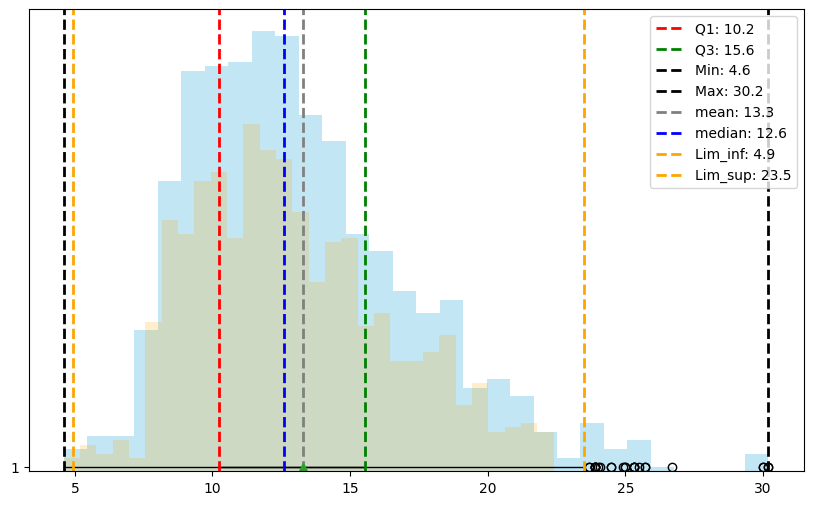

In [97]:
imprime_grafico(fuel_city, array_sin_outliners )

### Ejercicio 04:
- Define una función que toma un array como entrada, y retorna el mismo array sin los outliers.
- Utiliza la **Puntuación Z** para el filtrado de valores atípicos.
- Prueba la función con los arrays _**fuel_city**_ y _**fuel_hwy**_, y calcula qué porcentaje de datos se ha conservado tras el filtrado de outliers para cada caso.

### Ejercicio 05:
- Repite el ejercicio 4 usando la **Valla de Tukey** para el filtrado de outliers.

### Ejercicio 06:
- Define una función que tome como parámetro un array y dibuje un plot. El plot debe tener:
    - La distribución de los datos del array como un histograma de color verde pastel.
    - Una línea vertical de color rojo que represente el promedio.
    - Una línea vertical de color dorado que represente la mediana.
    - Dos líneas verticales discontinuas de color gris claro que representen $-z$ y $z$.
    - Dos líneas verticales discontinuas de color gris oscuro que representen $-3z$ y $3z$.
    - Los outliers se tienen que marcar con un color naranja chillón.
    
- Aprovecha las funciones del ejercicio 1 y del ejercicio 3 para obtener los estadísticos necesarios y filtrar los outliers.
- Guiate por los notebooks de teoría para cambiar el color de las gráficas y hacer las lineas verticales.

### Ejercicio 07:
- Define una función que estandarice los datos de un array usando la siguiente fórmula:

$$
z = \frac{x_{i} - \overline{x}}{\sigma_{x}} = \frac{x_{i} - mean(x)}{std(x)}
$$

- Prueba estandarizar un array y hacer un plot usando la función del ejercicio anterior. ¿Qué diferencias ves?

### Ejercicio 08:
- Aplica una transformación de logaritmo neperiano (_**np.log**_) a los datos de **fuel_city** y **fuel_hwy** y vuelve a probar a usar la función del ejercicio 6.
- ¿Cómo son ahora las distribuciones?
- ¿Qué ocurre con los outliers?

### Ejercicio 09:
- Defina una función que calcule la correlación entre dos arrays. Apoyate en las siguientes fórmulas:

$$
\Large Cov(X, Y) = \frac{\sum_{i=1}^{n}(x_{i} - \bar{x})(y_{i} - \bar{y})}{n}\\
$$

<br>

$$
\Large \rho = \frac{Cov(X, Y)}{\sigma_{x}\sigma_{y}}
$$

- Usa la función para calcular la correlación entre **fuel_city** y **fuel_hwy**.
- Comprueba que funciona correctamente contrastando con el resultado de la función _**stats.pearsonr()**_.

### Ejercicio 10:
- Elige un array y toma 50 elementos aleatorios. Calcula las estadísticas para ese nuevo conjunto de datos.
- ¿Son similares estos resultados a los obtenidos de la población total?

### Ejercicio 11:
- Repite el ejercicio anterior, esta vez creando 5 conjuntos de 50 elementos aleatorios.
    - Calcula las estadísticas para cada conjunto de 50 elementos, guarda estos datos.
    - Calcula las estadísticas de los resultados anteriores.
    - ¿Son similares estos datos con los obtenidos de la población total?
    - Prueba hacerlo creando 100 conjuntos de 50 elementos esta vez.

### Ejercicio 12:
- Realiza un contraste de hipótesis y comprueba si se gasta más combustible en la ciudad que en la autovía.
    - **fuel_city**: gasto en ciudad
    - **fuel_hwy**: gasto en autovía
    - $H_0$: el gasto de combustible en la ciudad es igual o menor al gasto en la autovía.
    - $H_1$: el gasto de combustible en la ciudad es mayor al gasto en la autovía.
    
_**Pista**: hay que aplicar una prueba **t de Student** para **muestras pareadas** `stats.ttest_rel()`, o una prueba **Wilcoxon** para **muestras pareadas** `stats.wilcoxon()`, dependiendo de si se cumplen los supuestos de normalidad y homogeneidad de varianzas. Pueden especificar el parámetro `alternative` con el argumento `"greater"` para un contraste de tipo `a>b`._

In [ ]:
##############################################################################################################################